In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_components
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from statsmodels.graphics import tsaplots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress specific statsmodels warnings about frequency
warnings.filterwarnings('ignore', 'No frequency information was provided')
warnings.filterwarnings('ignore', 'No supported index is available')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [23]:
df = pd.read_csv('data/full_air_data_transformed.csv', parse_dates=['Date'])
df.head()

,Date,CO
0,2000-01-01,1.953571
1,2000-01-16,1.765625
2,2000-02-01,2.250000
3,2000-02-16,1.685714
4,2000-03-01,1.306667


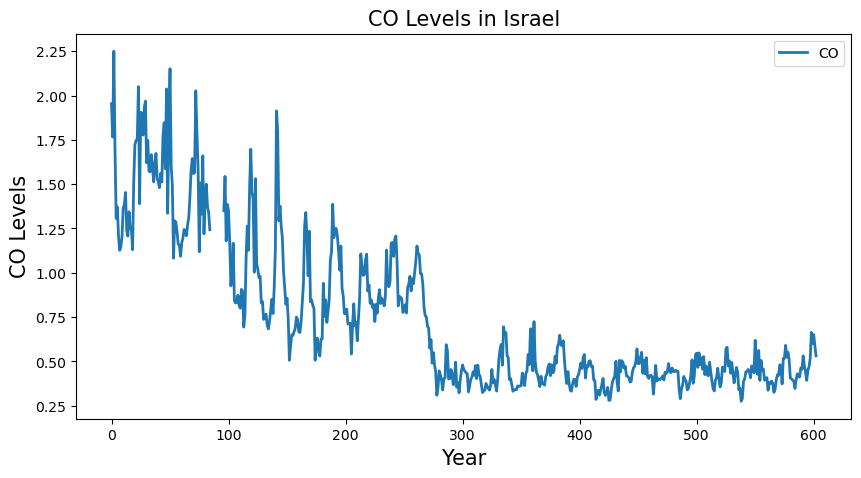

In [24]:
dfCO = df[["CO"]]
dfCO.plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.title("CO Levels in Israel",fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.ylabel('CO Levels', fontsize=15);

Detected change point indices: [90, 260, 592]


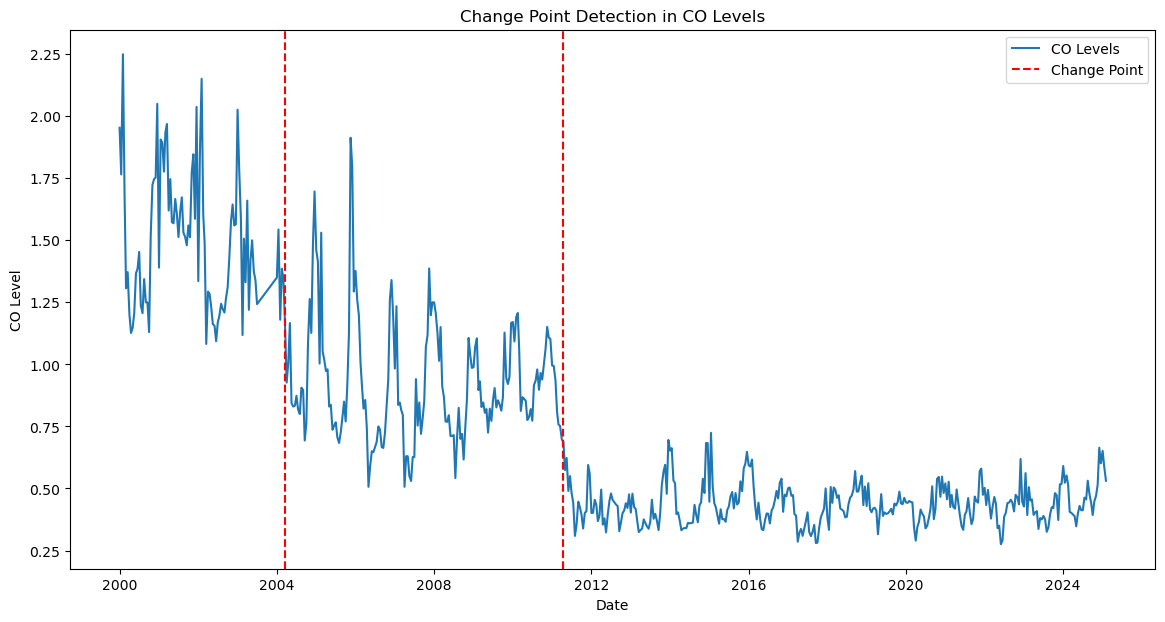

[90, 260, 592]

In [25]:
def detect_change_points(df, penalty: float = 10,data_type: str = 'CO'):
    """
    performs change point detection on the 'CO' column
    using the PELT algorithm with a specified penalty value, and plots the results.
    
    Args:
        df: time series dataframe.
        penalty (float): Penalty value for the PELT algorithm to control sensitivity.
        

    Returns:
        list: A list of change point indices.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import ruptures as rpt

    # Load data and set the date index
    df.set_index('Date', inplace=True)
    df = df[[data_type]]
    
    # Remove missing CO values, if any
    df.dropna(inplace=True)

    # Extract the time series as a numpy array
    signal = df[data_type].values

    # Applying the PELT algorithm with a 'rbf' model – you can experiment with other models like "l2"
    algo = rpt.Pelt(model="rbf").fit(signal)
    change_pt_indices = algo.predict(pen=penalty)
    
    print("Detected change point indices:", change_pt_indices)

    # Plot the CO time series with the detected change points
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, signal, label="CO Levels")
    
    # Mark each change point with a red dashed vertical line.
    # Note: The change point index returned by ruptures is the index of the segment's end.
    for cp in change_pt_indices:
        if cp < len(df):  # Ensure the index exists in the data
            plt.axvline(x=df.index[cp], color="red", linestyle="--",
                        label="Change Point" if cp == change_pt_indices[0] else "")
    
    plt.title("Change Point Detection in CO Levels")
    plt.xlabel("Date")
    plt.ylabel("CO Level")
    plt.legend()
    plt.show()

    return change_pt_indices

detect_change_points(df, penalty=10,data_type='CO')